## LSTM - With conventional data representation approach *lat, lon

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import Sequence

In [2]:
to_store_path = r'D:\2 Thesis\2 models\2023.07.02 all models\LSTM_02\prediction csv\v1_lstm_pred_output_74_74.csv'

In [3]:
X_train = np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\1_10_train\data_2019_train_X_v8_out.npy').astype('float32')
Y_train_lat =np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\1_10_train\data_2019_train_Y_lat_v8_out.npy').astype('float32')
Y_train_lon =np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\1_10_train\data_2019_train_Y_lon_v8_out.npy').astype('float32')

X_val = np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\11_val\data_2019_11_X.npy').astype('float32')
Y_val_lat = np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\11_val\data_2019_11_Y_lat.npy').astype('float32')
Y_val_lon = np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\11_val\data_2019_11_Y_lon.npy').astype('float32')

X_test = np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\12_test\data_2019_12_X.npy')
Y_test_lat = np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\12_test\data_2019_12_Y_lat.npy')
Y_test_lon = np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\12_test\data_2019_12_Y_lon.npy')

In [4]:
## Checkpoint save - lat
checkpoint_filepath_lat = r'D:\2 Thesis\2 models\2023.07.02 all models\LSTM_02\best model normal ds\lstm_lat_best_model_v1_74_74.h5'

## Checkpoint save - lon
checkpoint_filepath_lon = r'D:\2 Thesis\2 models\2023.07.02 all models\LSTM_02\best model normal ds\lstm_lon_best_model_v1_74_74.h5'

In [5]:
class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y


In [6]:
train_gen_lat = DataGenerator(X_train, Y_train_lat, 200)
val_gen_lat = DataGenerator(X_val, Y_val_lat, 200)

train_gen_lon = DataGenerator(X_train, Y_train_lon, 200)
val_gen_lon = DataGenerator(X_val, Y_val_lon, 200)

In [4]:
## the LSTM model
def lstm_model(n_steps_input, n_steps_output, n_features):
    model = Sequential()
    model.add(LSTM(74, activation="tanh", input_shape=(n_steps_input, n_features), return_sequences=True))
    model.add(LSTM(74, activation="tanh", return_sequences=True))
    model.add(Dense(1))
    return model

In [5]:
model_summary = lstm_model(10,10,8).summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 74)            24568     
                                                                 
 lstm_3 (LSTM)               (None, 10, 74)            44104     
                                                                 
 dense_1 (Dense)             (None, 10, 1)             75        
                                                                 
Total params: 68,747
Trainable params: 68,747
Non-trainable params: 0
_________________________________________________________________


In [9]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [10]:
model_lat = lstm_model(n_steps_input = 10, n_steps_output = 10  , n_features = 8 )

# Compile the model
model_lat.compile(optimizer= Adam(learning_rate = 0.00001), loss = 'mean_squared_error', metrics=['mae'] )#model.compile(optimizer=Adam(learning_rate = 0.0001), loss="mse")
checkpoint_lat = ModelCheckpoint(checkpoint_filepath_lat, monitor='val_loss', save_best_only=True, mode='min')

# Train the model
history_lat = model_lat.fit(train_gen_lat, validation_data = val_gen_lat, epochs=20, verbose=1, callbacks = [checkpoint_lat])   #epochs=200, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/20
54621/54621 [==============================] - 695s 13ms/step - loss: 0.0043 - mae: 0.0177 - val_loss: 1.7216e-05 - val_mae: 0.0031
Epoch 2/20
54621/54621 [==============================] - 663s 12ms/step - loss: 1.4312e-05 - mae: 0.0027 - val_loss: 1.2282e-05 - val_mae: 0.0027
Epoch 3/20
54621/54621 [==============================] - 634s 12ms/step - loss: 8.4057e-06 - mae: 0.0020 - val_loss: 5.5492e-06 - val_mae: 0.0015
Epoch 4/20
54621/54621 [==============================] - 639s 12ms/step - loss: 6.1559e-06 - mae: 0.0016 - val_loss: 6.6997e-06 - val_mae: 0.0018
Epoch 5/20
54621/54621 [==============================] - 615s 11ms/step - loss: 5.3287e-06 - mae: 0.0015 - val_loss: 4.5370e-06 - val_mae: 0.0013
Epoch 6/20
54621/54621 [==============================] - 636s 12ms/step - loss: 4.8385e-06 - mae: 0.0014 - val_loss: 3.7280e-06 - val_mae: 0.0011
Epoch 7/20
54621/54621 [==============================] - 648s 12ms/step - loss: 4.5915e-06 - mae: 0.0013 - val_loss: 3.37

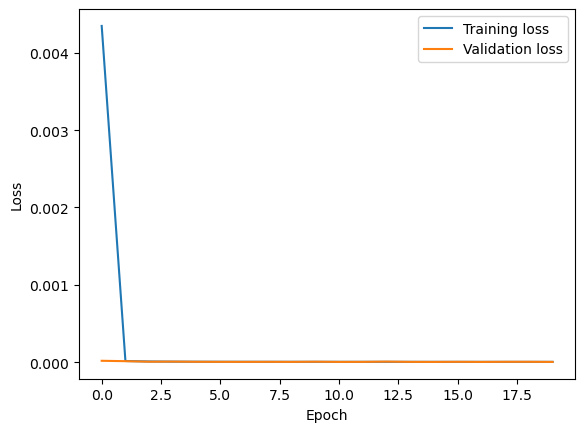

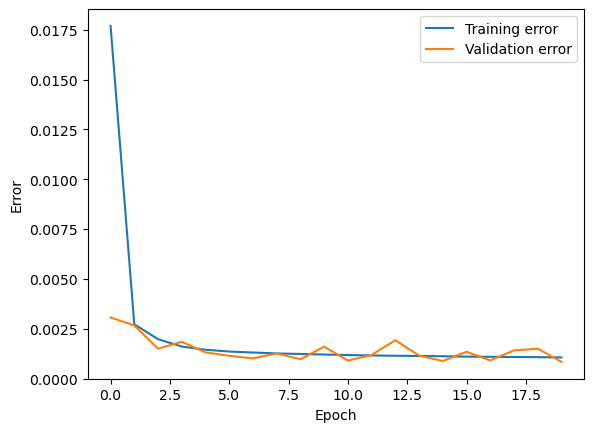

In [11]:
# Plot the training and validation loss
plt.plot(history_lat.history['loss'], label='Training loss')
plt.plot(history_lat.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation error
plt.plot(history_lat.history['mae'], label='Training error')
plt.plot(history_lat.history['val_mae'], label='Validation error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

In [12]:
best_model_lat = load_model(checkpoint_filepath_lat)
# Evaluate the model
Y_test_pred_lat = best_model_lat.predict(X_test)

28322/28322 [==============================] - 124s 4ms/step


In [13]:
Y_test_lat = Y_test_lat.squeeze()

In [14]:
mse_lat = mean_squared_error(Y_test_lat, Y_test_pred_lat)
print("Mean Squared Error for lat predictions:", mse_lat)



Mean Squared Error for lat predictions: 2.6205225874749763e-06


#### LONGITUDE PREDICTIONS

In [15]:


model_lon = lstm_model(n_steps_input = 10, n_steps_output = 10  , n_features = 8 )
model_lon.compile(optimizer = Adam(learning_rate = 0.00001), loss = 'mean_squared_error', metrics=['mae'])

# save checkpoint
checkpoint_lon = ModelCheckpoint(checkpoint_filepath_lon, monitor='val_loss', save_best_only=True, mode='min')

history_lon = model_lon.fit(train_gen_lon, validation_data = val_gen_lon, epochs=20, verbose=1 , callbacks = [checkpoint_lon])

Epoch 1/20
54621/54621 [==============================] - 775s 14ms/step - loss: 0.0047 - mae: 0.0174 - val_loss: 1.8925e-05 - val_mae: 0.0031
Epoch 2/20
54621/54621 [==============================] - 769s 14ms/step - loss: 1.6231e-05 - mae: 0.0028 - val_loss: 1.3188e-05 - val_mae: 0.0025
Epoch 3/20
54621/54621 [==============================] - 738s 14ms/step - loss: 1.2133e-05 - mae: 0.0024 - val_loss: 1.5436e-05 - val_mae: 0.0030
Epoch 4/20
54621/54621 [==============================] - 752s 14ms/step - loss: 9.8871e-06 - mae: 0.0021 - val_loss: 8.3863e-06 - val_mae: 0.0019
Epoch 5/20
54621/54621 [==============================] - 714s 13ms/step - loss: 8.3098e-06 - mae: 0.0019 - val_loss: 8.0456e-06 - val_mae: 0.0020
Epoch 6/20
54621/54621 [==============================] - 735s 13ms/step - loss: 7.0663e-06 - mae: 0.0017 - val_loss: 6.5926e-06 - val_mae: 0.0017
Epoch 7/20
54621/54621 [==============================] - 759s 14ms/step - loss: 6.1046e-06 - mae: 0.0015 - val_loss: 5.79

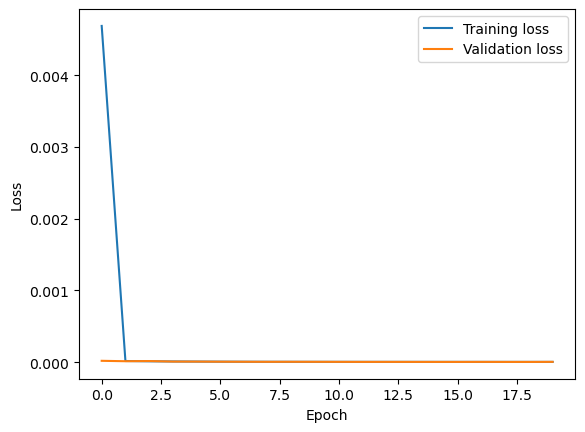

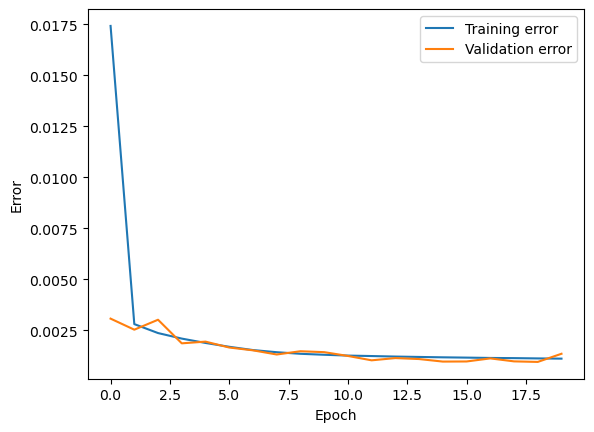

In [16]:
# Plot the training and validation loss
plt.plot(history_lon.history['loss'], label='Training loss')
plt.plot(history_lon.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation error
plt.plot(history_lon.history['mae'], label='Training error')
plt.plot(history_lon.history['val_mae'], label='Validation error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

In [17]:
best_model_lon = load_model(checkpoint_filepath_lon)
# Evaluate the model
Y_test_pred_lon = best_model_lon.predict(X_test)

28322/28322 [==============================] - 99s 3ms/step


In [19]:
Y_test_lon = Y_test_lon.squeeze()
mse_lon = mean_squared_error(Y_test_lon, Y_test_pred_lon)
print("Mean Squared Error for lon predictions:", mse_lon)

Mean Squared Error for lon predictions: 3.3782513678694562e-06


In [20]:
# print('lat minimum val_mean_absolute_error', min(history_lat.history['val_mae']) )
# print('lat minimum train_mean_absolute_error', min(history_lat.history['mae']))

# print('lon minimum val_mean_absolute_error', min(history_lon.history['val_mae']) )
# print('lon minimum train_mean_absolute_error', min(history_lon.history['mae']))

In [21]:
Y_pred_lat_flat = Y_test_pred_lat.flatten()
Y_pred_lat_df = pd.DataFrame(Y_pred_lat_flat, columns=['lat_s_pred'])

Y_pred_lon_flat = Y_test_pred_lon.flatten()
Y_pred_lon_df = pd.DataFrame(Y_pred_lon_flat, columns=['lon_s_pred'])

# Concatnating the lat lon predictions - to on df
Y_pred_df = pd.concat([Y_pred_lat_df, Y_pred_lon_df], axis=1)

In [22]:
Y_test_lat_flat = Y_test_lat.flatten()
Y_test_lat_df = pd.DataFrame(Y_test_lat_flat, columns=['lat_s_test'])

Y_test_lon_flat = Y_test_lon.flatten()
Y_test_lon_df = pd.DataFrame(Y_test_lon_flat, columns=['lon_s_test'])

# Concatnating the lat lon test data - to on df
Y_test_df = pd.concat([Y_test_lat_df, Y_test_lon_df], axis=1)

In [23]:
# converting back to lat long degrees
min_lat, max_lat = 58.6, 59.93
min_lon, max_lon = 9.4, 11.45

Y_pred_df['lat_pred'] = Y_pred_df['lat_s_pred'] * (max_lat - min_lat) + min_lat
Y_pred_df['lon_pred'] = Y_pred_df['lon_s_pred'] * (max_lon - min_lon) + min_lon

Y_test_df['lat_test'] = Y_test_df['lat_s_test'] * (max_lat - min_lat) + min_lat
Y_test_df['lon_test'] = Y_test_df['lon_s_test'] * (max_lon - min_lon) + min_lon


In [24]:
Y_test_and_pred_df = pd.concat([Y_pred_df, Y_test_df], axis=1)

In [25]:
from haversine import haversine, Unit

Y_test_and_pred_df['deviation_dist_m'] = Y_test_and_pred_df.apply(lambda row: haversine(
    (row['lat_pred'], 
    row['lon_pred']),
    (row['lat_test'], 
    row['lon_test']),
    unit=Unit.METERS
    ),axis=1)

In [26]:
mean_deviation = Y_test_and_pred_df['deviation_dist_m'].mean()
median_deviation = Y_test_and_pred_df['deviation_dist_m'].median()

print('LSTM_model_mean_displacement_error:', mean_deviation)
print('LSTM_model_median_displacement_error:', median_deviation)


LSTM_model_mean_displacement_error: 183.39227754747398
LSTM_model_median_displacement_error: 107.94974364634314


In [27]:
step_means = []
for step in range(10):
    step_mean = Y_test_and_pred_df['deviation_dist_m'][step::9].mean()
    step_means.append(step_mean)


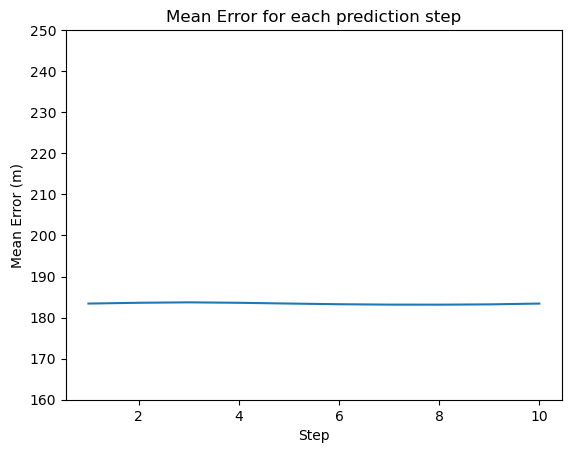

In [28]:
import matplotlib.pyplot as plt

step_means = []
for step in range(10):
    step_mean = Y_test_and_pred_df['deviation_dist_m'][step::9].mean()
    step_means.append(step_mean)

plt.plot(range(1, 11), step_means)
plt.xlabel('Step')
plt.ylabel('Mean Error (m)')
plt.title('Mean Error for each prediction step')
plt.ylim(0, 250)
plt.show()


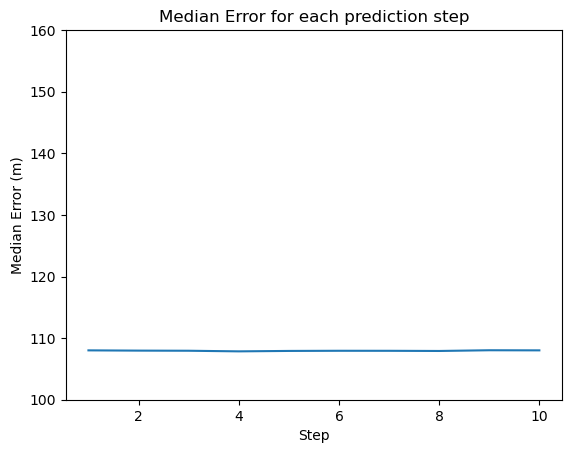

In [36]:
import matplotlib.pyplot as plt

step_medians = []
for step in range(10):
    step_median = Y_test_and_pred_df['deviation_dist_m'][step::9].median()
    step_medians.append(step_median)

plt.plot(range(1, 11), step_medians)
plt.xlabel('Step')
plt.ylabel('Median Error (m)')
plt.title('Median Error for each prediction step')
plt.ylim(0,160)
plt.show()


In [30]:

step_FDE = Y_test_and_pred_df['deviation_dist_m'][9::9].mean()
print('Final displacement error (meters) is:', step_FDE)

Final displacement error (meters) is: 183.4153594486264


In [31]:
Y_test_and_pred_df['voyage_id'] = Y_test_and_pred_df.index // 10
Y_test_and_pred_df['step'] = np.arange(len(Y_test_and_pred_df)) % 10


In [32]:
Y_test_and_pred_df.to_csv(to_store_path)
